## Import Libraries and Load Data

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Set the Seaborn style to 'whitegrid' and the color palette to 'muted'
sns.set_style("whitegrid")
sns.set_palette("muted")

# Load the IMDB dataset with all words
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=None)

# Retrieve the word index which maps words to their integer indices
word_index = tf.keras.datasets.imdb.get_word_index()

# Reverse the word index to get a mapping from index to word
reverse_word_index = {value: key for (key, value) in word_index.items()}

## Decode Reviews and Prepare Data

In [4]:
# Decode the reviews from integer indices to actual words
train_reviews_text = [' '.join([reverse_word_index.get(i, '') for i in review]) for review in train_data]

# Calculate the length of each review in terms of number of words
review_lengths = [len(review.split()) for review in train_reviews_text]

## Review Length Distribution

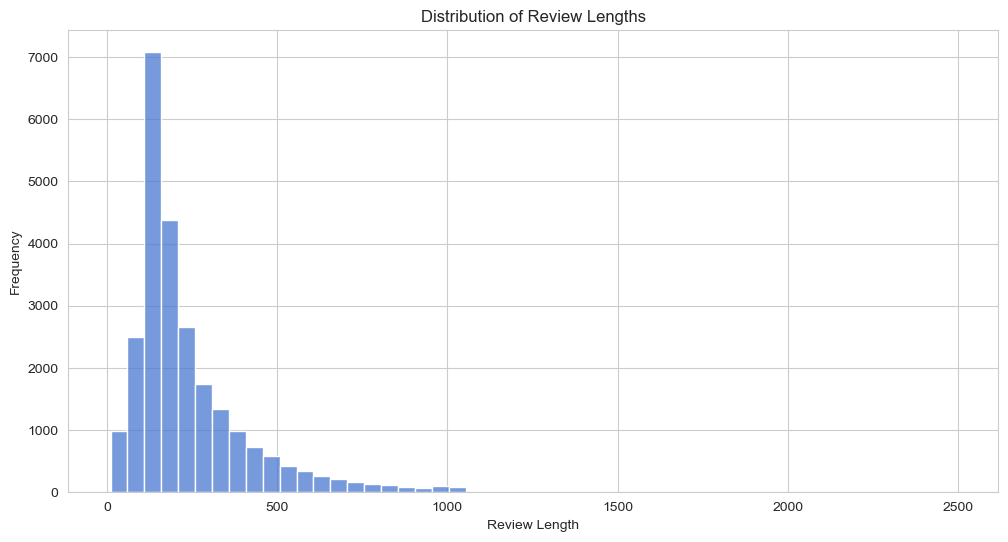

In [6]:
# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(review_lengths, bins=50, kde=False, color=sns.color_palette("muted")[0])
plt.title('Distribution of Review Lengths')  # Title of the plot
plt.xlabel('Review Length')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot

## Review Length Analysis by Sentiment

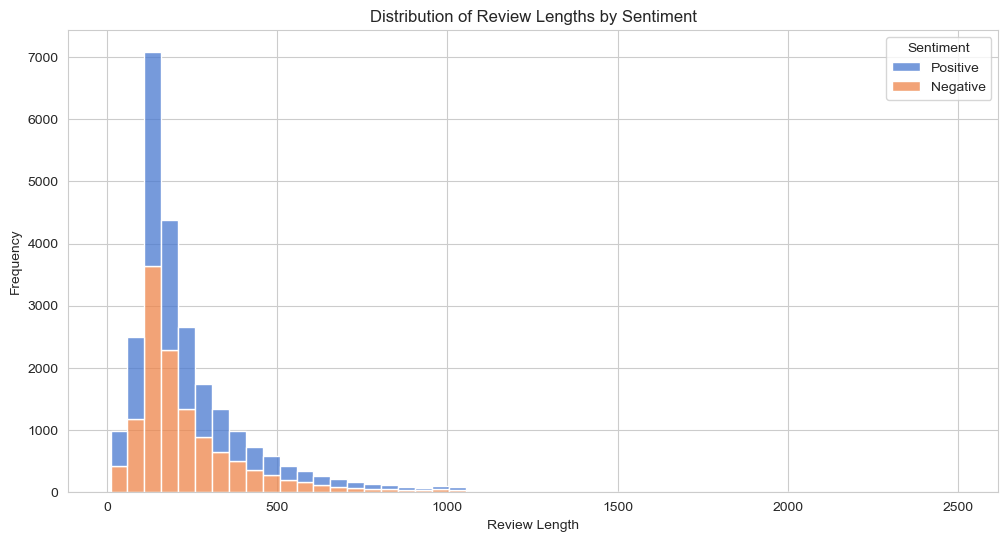

In [8]:
# Create a DataFrame with review lengths and corresponding sentiments
df_lengths = pd.DataFrame({
    'Length': review_lengths,
    'Sentiment': [train_labels[i] for i in range(len(review_lengths))]
})

# Map sentiment labels to descriptive names
df_lengths['Sentiment'] = df_lengths['Sentiment'].map({0: 'Negative', 1: 'Positive'})

# Plot the distribution of review lengths, split by sentiment
plt.figure(figsize=(12, 6))
sns.histplot(df_lengths, x='Length', hue='Sentiment', multiple='stack', palette='muted', bins=50)
plt.title('Distribution of Review Lengths by Sentiment')  # Title of the plot
plt.xlabel('Review Length')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot

## Most Common Words

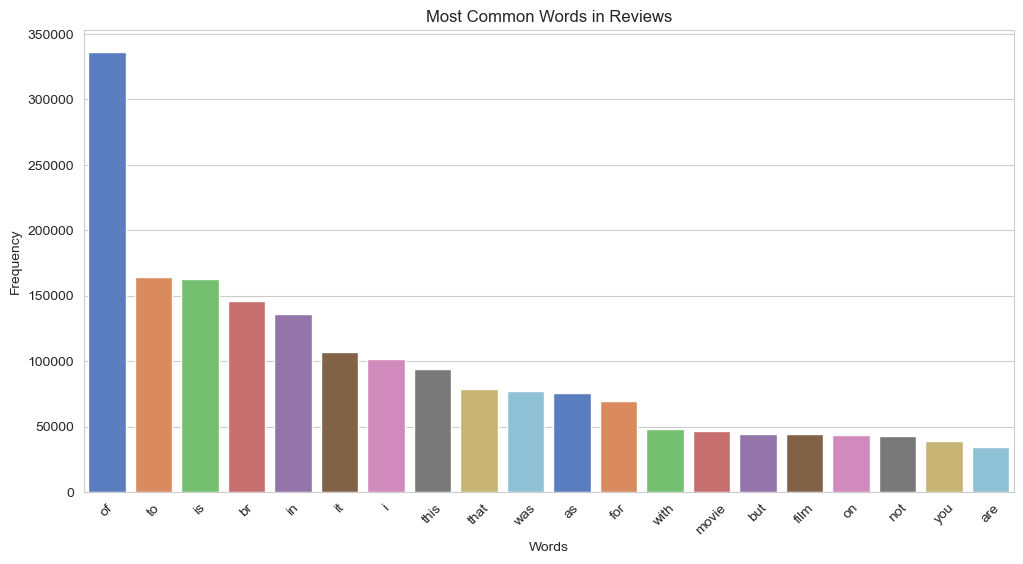

In [10]:
# Flatten the list of all reviews to get a list of all words
all_words = [word for review in train_data for word in review]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Convert word indices to actual words
most_common_words_decoded = [(reverse_word_index.get(i, ''), count) for i, count in most_common_words]

# Separate words and their counts for plotting
words, counts = zip(*most_common_words_decoded)

# Create a DataFrame for easy plotting with Seaborn
df_common_words = pd.DataFrame({
    'Words': words,
    'Counts': counts
})

# Plot the most common words using the muted palette
plt.figure(figsize=(12, 6))
sns.barplot(data=df_common_words, x='Words', y='Counts', hue='Words', dodge=False, palette='muted', legend=False)
plt.title('Most Common Words in Reviews')  # Title of the plot
plt.xlabel('Words')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

## Most Common Bigrams

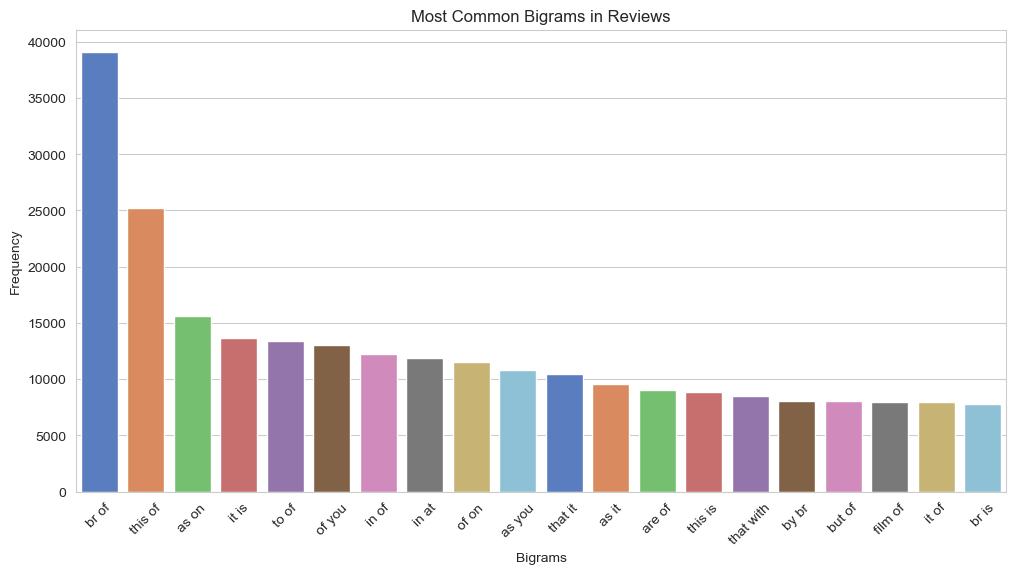

In [12]:
# Extract bigrams (two-word phrases) from the reviews
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(train_reviews_text)
bigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

# Get the 20 most common bigrams
most_common_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Convert to DataFrame for plotting
bigrams, bigram_counts = zip(*most_common_bigrams)
df_bigrams = pd.DataFrame({'Bigrams': bigrams, 'Counts': bigram_counts})

# Plot the most common bigrams
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bigrams, x='Bigrams', y='Counts', hue='Bigrams', dodge=False, palette='muted', legend=False)
plt.title('Most Common Bigrams in Reviews')  # Title of the plot
plt.xlabel('Bigrams')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

## Most Common Trigrams

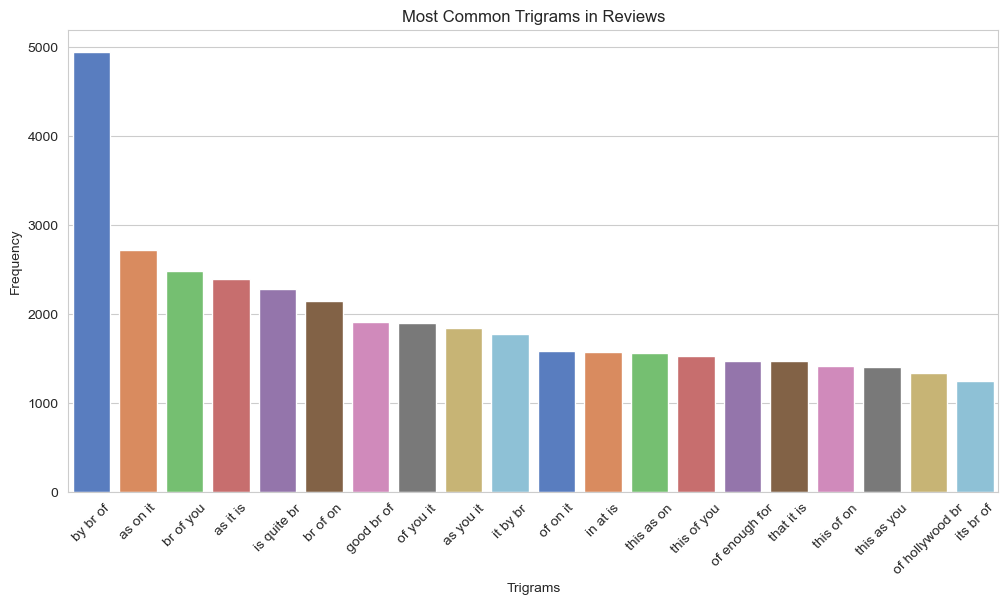

In [14]:
# Extract trigrams (three-word phrases) from the reviews
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(train_reviews_text)
trigram_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

# Get the 20 most common trigrams
most_common_trigrams = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:20]

# Convert to DataFrame for plotting
trigrams, trigram_counts = zip(*most_common_trigrams)
df_trigrams = pd.DataFrame({'Trigrams': trigrams, 'Counts': trigram_counts})

# Plot the most common trigrams
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trigrams, x='Trigrams', y='Counts', hue='Trigrams', dodge=False, palette='muted', legend=False)
plt.title('Most Common Trigrams in Reviews')  # Title of the plot
plt.xlabel('Trigrams')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

## Sample Reviews by Sentiment

In [16]:
# Get sample positive and negative reviews
positive_reviews = [review for review, label in zip(train_data, train_labels) if label == 1]
negative_reviews = [review for review, label in zip(train_data, train_labels) if label == 0]

# Decode and print sample positive reviews
print("Sample Positive Reviews:")
for review in positive_reviews[:3]:
    print(' '.join([reverse_word_index.get(i, '') for i in review]))
    print()

# Decode and print sample negative reviews
print("Sample Negative Reviews:")
for review in negative_reviews[:3]:
    print(' '.join([reverse_word_index.get(i, '') for i in review]))
    print()

Sample Positive Reviews:
the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart 